In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
movie= pd.read_csv('Movie.csv')
mg= pd.read_csv('Movie Genres.csv')
genres= pd.read_csv('Genres.csv')
movie_columns =['mov_id','mov_title','mov_year','mov_lang']
columns_to_drop = [col for col in movie.columns if col not in  movie_columns]
movie.drop(columns=columns_to_drop, inplace=True)
movie.head(10)

,mov_id,mov_title,mov_year,mov_lang
0,901,Vertigo,1958,English
1,902,The Innocents,1961,English
2,903,Lawrence of Arabia,1962,English
3,904,The Deer Hunter,1978,English
4,905,Amadeus,1984,English
5,906,Blade Runner,1982,English
6,907,Eyes Wide Shut,1999,English
7,908,The Usual Suspects,1995,English
8,909,Chinatown,1974,English
9,910,Boogie Nights,1997,English


In [3]:
mg.head()


,mov_id,gen_id
0,922,1001
1,917,1002
2,903,1002
3,912,1003
4,911,1005


In [4]:
genres.head()


,gen_id,gen_title
0,1001,Action
1,1002,Adventure
2,1003,Animation
3,1004,Biography
4,1005,Comedy


In [5]:
df=genres.merge(mg , on="gen_id")

In [6]:
df.head()

,gen_id,gen_title,mov_id
0,1001,Action,922
1,1002,Adventure,917
2,1002,Adventure,903
3,1003,Animation,912
4,1005,Comedy,911


In [7]:
movie=movie.merge(df , on="mov_id")

In [8]:
movie.head()

,mov_id,mov_title,mov_year,mov_lang,gen_id,gen_title
0,901,Vertigo,1958,English,1010,Mystery
1,902,The Innocents,1961,English,1008,Horror
2,903,Lawrence of Arabia,1962,English,1002,Adventure
3,904,The Deer Hunter,1978,English,1013,War
4,906,Blade Runner,1982,English,1012,Thriller


In [9]:
movie_columns =['mov_id','mov_title','mov_year','mov_lang','gen_title']
columns_to_drop = [col for col in movie.columns if col not in  movie_columns]
movie.drop(columns=columns_to_drop, inplace=True)
movie.head()

,mov_id,mov_title,mov_year,mov_lang,gen_title
0,901,Vertigo,1958,English,Mystery
1,902,The Innocents,1961,English,Horror
2,903,Lawrence of Arabia,1962,English,Adventure
3,904,The Deer Hunter,1978,English,War
4,906,Blade Runner,1982,English,Thriller


In [16]:
ratings=pd.read_csv('Rating.csv')
ratings.head()

,mov_id,rev_id,rev_stars,num_o_ratings
0,901,9001,8.4,263575.0
1,902,9002,7.9,20207.0
2,903,9003,8.3,202778.0
3,906,9005,8.2,484746.0
4,924,9006,7.3,NaN


In [18]:
movie=movie.merge(ratings, on="mov_id")
movie.head()

,mov_id,mov_title,mov_year,mov_lang,gen_title,rev_id,rev_stars,num_o_ratings
0,901,Vertigo,1958,English,Mystery,9001,8.4,263575.0
1,902,The Innocents,1961,English,Horror,9002,7.9,20207.0
2,903,Lawrence of Arabia,1962,English,Adventure,9003,8.3,202778.0
3,906,Blade Runner,1982,English,Thriller,9005,8.2,484746.0
4,908,The Usual Suspects,1995,English,Crime,9007,8.6,779489.0


In [19]:
del movie["rev_id"]

In [20]:
movie.head(10)

,mov_id,mov_title,mov_year,mov_lang,gen_title,rev_stars,num_o_ratings
0,901,Vertigo,1958,English,Mystery,8.4,263575.0
1,902,The Innocents,1961,English,Horror,7.9,20207.0
2,903,Lawrence of Arabia,1962,English,Adventure,8.3,202778.0
3,906,Blade Runner,1982,English,Thriller,8.2,484746.0
4,908,The Usual Suspects,1995,English,Crime,8.6,779489.0
5,911,Annie Hall,1977,English,Comedy,8.1,203875.0
6,912,Princess Mononoke,1997,Japanese,Animation,8.4,NaN
7,914,American Beauty,1999,English,Romance,7.0,862618.0
8,918,Trainspotting,1996,English,Drama,NaN,580301.0
9,921,Slumdog Millionaire,2008,English,Drama,8.0,667758.0


In [21]:
rstars_avg=movie["rev_stars"].mean()
rstars_avg

8.000000000000002

In [22]:
movie['rev_stars'] = movie['rev_stars'].fillna(rstars_avg)
movie.head(10)

,mov_id,mov_title,mov_year,mov_lang,gen_title,rev_stars,num_o_ratings
0,901,Vertigo,1958,English,Mystery,8.4,263575.0
1,902,The Innocents,1961,English,Horror,7.9,20207.0
2,903,Lawrence of Arabia,1962,English,Adventure,8.3,202778.0
3,906,Blade Runner,1982,English,Thriller,8.2,484746.0
4,908,The Usual Suspects,1995,English,Crime,8.6,779489.0
5,911,Annie Hall,1977,English,Comedy,8.1,203875.0
6,912,Princess Mononoke,1997,Japanese,Animation,8.4,NaN
7,914,American Beauty,1999,English,Romance,7.0,862618.0
8,918,Trainspotting,1996,English,Drama,8.0,580301.0
9,921,Slumdog Millionaire,2008,English,Drama,8.0,667758.0


In [23]:
norat_avg=movie["num_o_ratings"].mean()
norat_avg

417277.36363636365

In [24]:
movie["num_o_ratings"]=movie["num_o_ratings"].fillna(norat_avg)
movie.head(10)

,mov_id,mov_title,mov_year,mov_lang,gen_title,rev_stars,num_o_ratings
0,901,Vertigo,1958,English,Mystery,8.4,263575.000000
1,902,The Innocents,1961,English,Horror,7.9,20207.000000
2,903,Lawrence of Arabia,1962,English,Adventure,8.3,202778.000000
3,906,Blade Runner,1982,English,Thriller,8.2,484746.000000
4,908,The Usual Suspects,1995,English,Crime,8.6,779489.000000
5,911,Annie Hall,1977,English,Comedy,8.1,203875.000000
6,912,Princess Mononoke,1997,Japanese,Animation,8.4,417277.363636
7,914,American Beauty,1999,English,Romance,7.0,862618.000000
8,918,Trainspotting,1996,English,Drama,8.0,580301.000000
9,921,Slumdog Millionaire,2008,English,Drama,8.0,667758.000000


In [25]:
C = movie['rev_stars'].mean()
m = movie['num_o_ratings'].quantile(0.75)
def points(x, m=m, C=C):
    v = x['num_o_ratings']
    R = x['rev_stars']
    return (v / (v + m)) * R + (m / (v + m)) * C
movie['score'] = movie.apply(points, axis=1)
movie = movie.sort_values('score', ascending=False)

In [26]:
movie.head(10)

,mov_id,mov_title,mov_year,mov_lang,gen_title,rev_stars,num_o_ratings,score
4,908,The Usual Suspects,1995,English,Crime,8.6,779489.000000,8.338502
10,922,Aliens,1986,English,Action,8.4,511613.000000,8.183740
6,912,Princess Mononoke,1997,Japanese,Animation,8.4,417277.363636,8.163728
0,901,Vertigo,1958,English,Mystery,8.4,263575.000000,8.121780
3,906,Blade Runner,1982,English,Thriller,8.2,484746.000000,8.089197
2,903,Lawrence of Arabia,1962,English,Adventure,8.3,202778.000000,8.075575
5,911,Annie Hall,1977,English,Comedy,8.1,203875.000000,8.025293
8,918,Trainspotting,1996,English,Drama,8.0,580301.000000,8.000000
9,921,Slumdog Millionaire,2008,English,Drama,8.0,667758.000000,8.000000
1,902,The Innocents,1961,English,Horror,7.9,20207.000000,7.996753


Text(0.5, 1.0, 'trending movies')

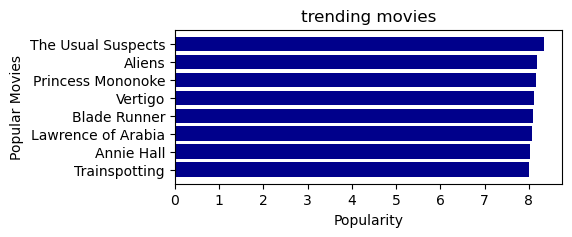

In [27]:
movie= movie.sort_values('score', ascending=False)
plt.figure(figsize=(5,2)) 
plt.barh(movie['mov_title'].head(8),movie['score'].head(8), align='center',color='darkblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.ylabel("Popular Movies")
plt.title("trending movies")

In [28]:
tfidf = TfidfVectorizer(stop_words='english')
movie['gen_title'] = movie['gen_title'].fillna('')
tfidf_matrix = tfidf.fit_transform(movie['gen_title'])
tfidf_matrix.shape

(12, 11)

In [29]:
for i in tfidf_matrix:
    print(i)

  (0, 4)	1.0
  (0, 0)	1.0
  (0, 2)	1.0
  (0, 8)	1.0
  (0, 10)	1.0
  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 9)	1.0


In [30]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [31]:
indices = pd.Series(movie.index, index=movie['gen_title']).drop_duplicates()
indices

gen_title
Crime         4
Action       10
Animation     6
Mystery       0
Thriller      3
Adventure     2
Comedy        5
Drama         8
Drama         9
Horror        1
Music        11
Romance       7
dtype: int64

In [61]:
def get_recommendations(title, cosine_sim=cosine_sim):
   idx = movie[movie['mov_title'] == title].index[0]
   sim_scores = list(enumerate(cosine_sim[idx]))
   sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   sim_scores = sim_scores[1:6]
   movie_indices = [i[0] for i in sim_scores]
  
   return movie['mov_title'].iloc[movie_indices]

In [65]:
recommendations = get_recommendations('Trainspotting')
print("Recommendations in relation to 'Trainspotting':")
print(recommendations)

Recommendations in relation to 'Trainspotting':
9     Slumdog Millionaire
4      The Usual Suspects
10                 Aliens
6       Princess Mononoke
0                 Vertigo
Name: mov_title, dtype: object


In [34]:
recommendations = get_recommendations('The Innocents')
print("Recommendations in relation to 'Trainspotting':")
print(recommendations)

Recommendations in relation to 'Trainspotting':
4    The Usual Suspects
6     Princess Mononoke
0               Vertigo
3          Blade Runner
2    Lawrence of Arabia
Name: mov_title, dtype: object
